In [77]:
# FS wave propagation plots using solution to Helmholtz, 2015-11-23

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [78]:
# The solution formula is a function of time so I chose time as the horizontal axis of the plot
# A spatial dimension could have been chosen instead but then extra calculations would be 
# required for the plot so its relationship with the solution formula wouldn't be so obvious.

c = 299792458         # Speed of light in a vaccum, m/s.
wavelength = 532e-9   # A nice green is 532 nm.

nu = c/wavelength     # Frequency == oscillation periods per unit time.
omega = 2*np.pi*nu    # Angular frequency == radians per unit time.

threewavetime = 3 * wavelength / c # Time for three waves to pass at speed of light.

samples = 100 # Number of moments in times we want to sample
timelist = np.linspace(0, threewavetime, samples) # A list of times to show on plot

clocklist = timelist # Oh this is such a horrible way to do it! But works it for the animation method.

amplitude = 3.0    # Amplitude of wave
phase = np.pi * 1  # Phase at reference position in space

# Make a phasor

U_p = amplitude * np.e**(1j*phase) 

# Solution of Helmholtz for wave height at various times == wave propagation in phasor notation

def u_p(time):
     return (U_p * np.e**(-1j*omega*time)).real

<IPython.core.display.Javascript object>


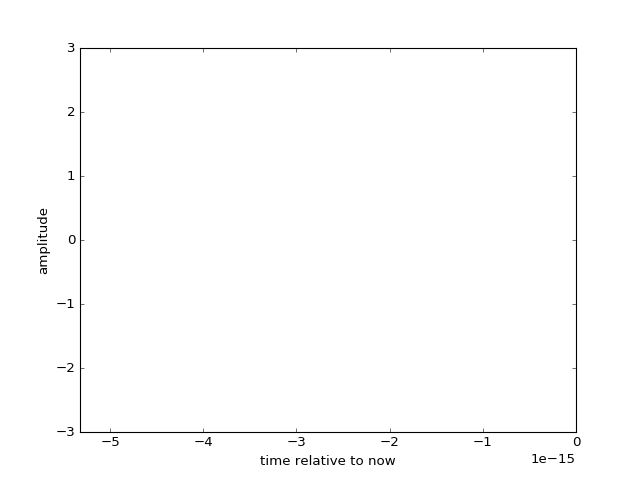

In [79]:
# Copied from an animation example on the web. The first one found with a Google search.
# I don't particularly like it but I don't want to spend ages writing a better one.

fig = plt.figure()
ax =  plt.axes(xlim=(-threewavetime,0), ylim=(-amplitude, +amplitude))
ax.set_xlabel('time relative to now')
ax.set_ylabel('amplitude')

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially

def animate(i):
    waveheight = u_p(clocklist[i]-timelist)
    line.set_data(-timelist, waveheight)                   
    return line,

In [80]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=samples, interval=20, blit=True, repeat=False)
plt.show()


Part 1


<IPython.core.display.Javascript object>


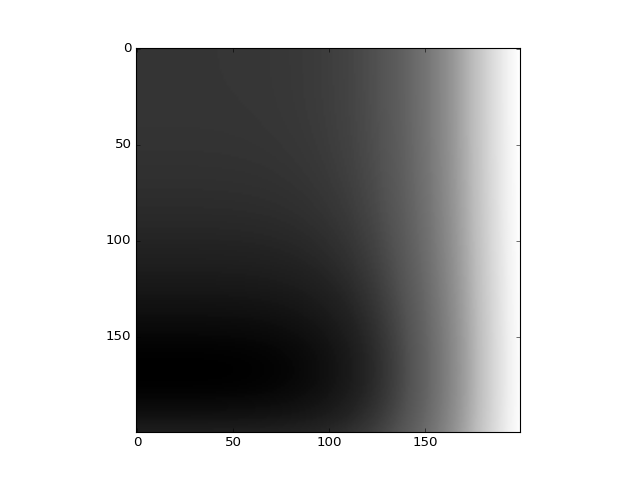

In [81]:
print("Part 1")
def f(x, y):
    return (np.power(x, 5) + np.power(y, 4) + 6*x - y*19 + 99999)

sampleRate = 100
plotLength = 2

x = np.linspace(0, plotLength, sampleRate*plotLength)
y = np.linspace(0, plotLength, sampleRate*plotLength)


X, Y = np.meshgrid(x, y)
grad = np.gradient(f(X, Y))

dfdx = grad[0]
dfdy = grad[1]
dfdxsq = np.power(dfdx, 2)
dfdysq = np.power(dfdy, 2)
total = [x+y for x, y in zip(dfdxsq, dfdysq)]
dfdxy = np.sqrt(total)
scp = plt.figure()
axscp = scp.add_subplot(1,1,1)
axscp.imshow(dfdxy, cmap=cm.Greys_r)

Part 2


<IPython.core.display.Javascript object>


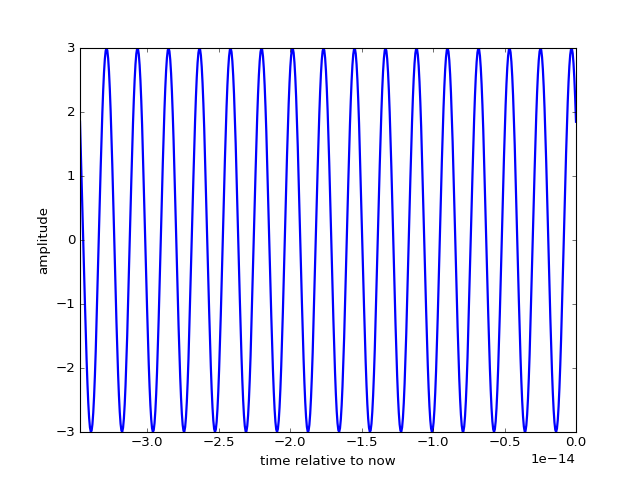

In [82]:
print("Part 2")

c = 299792458         # Speed of light in a vaccum, m/s.
wavelength = 650e-9   # A nice red is 650 nm.

nu = c/wavelength     # Frequency == oscillation periods per unit time.
omega = 2*np.pi*nu    # Angular frequency == radians per unit time.

threewavetime = 16 * wavelength / c # Time for three waves to pass at speed of light.

samples = 600 # Number of moments in times we want to sample
timelist = np.linspace(0, threewavetime, samples) # A list of times to show on plot

clocklist = timelist # Oh this is such a horrible way to do it! But works it for the animation method.

amplitude = 3.0    # Amplitude of wave
phase = np.pi * 1  # Phase at reference position in space

# Make a phasor

U_p = amplitude * np.e**(1j*phase) 

# Solution of Helmholtz for wave height at various times == wave propagation in phasor notation

def u_p(time):
     return (U_p * np.e**(-1j*omega*time)).real
    
    # Copied from an animation example on the web. The first one found with a Google search.
# I don't particularly like it but I don't want to spend ages writing a better one.

fig = plt.figure()
ax =  plt.axes(xlim=(-threewavetime,0), ylim=(-amplitude, +amplitude))
ax.set_xlabel('time relative to now')
ax.set_ylabel('amplitude')

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially

def animate(i):
    waveheight = u_p(clocklist[i]-timelist)
    line.set_data(-timelist, waveheight)                   
    return line,